In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd


In [2]:
import numpy as np
import pandas as pd
import re
import string
import math
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
df=pd.read_csv('sentences.csv', delimiter='\t', header=None, names=["1","language","Text"] )
del df["1"]
df = df[['Text', 'language']]

In [4]:
att=['ben','eng','guj','hin','kan','mal','mar','nep','ori','pan','san','tam','urd']
dataset= df.loc[df['language'].isin(att)]

In [5]:
dataset = dataset.drop(dataset.query('language == "eng"').sample(frac=.999).index)
dataset = dataset.drop(dataset.query('language == "mar"').sample(frac=.999).index)
dataset = dataset.drop(dataset.query('language == "hin"').sample(frac=.997).index)

dataset

,Text,language
1490,Ten years is a long time to wait.,eng
1889,Food and drink were served in such profusion a...,eng
2062,The essence of liberty is mathematics.,eng
15221,You may as well ask for your teacher's advice.,eng
15482,You are as white as a sheet.,eng
...,...,...
10294264,The house was beyond saving. It had to be torn...,eng
10297025,Ziri arrived at the house tired.,eng
10299919,"Tom is late, as usual.",eng
10304825,It takes courage to follow your heart.,eng


In [6]:
""""df['Text'] = df['Text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))
df['Text'] = df['Text'].apply(lambda x: x.lower())

#defining function for tokenization

def tokenization(text):
    tokens = re.split('W+',text)
    return tokens
#applying function to the column
df['Text'] = df['Text'].apply(lambda x: tokenization(x))

#importing nlp library
import nltk


#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()
#defining a function for stemming
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text
df['Text'] = df['Text'].apply(lambda x: stemming(x))

from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
df['Text'] = df['Text'].apply(lambda x:lemmatizer(x))
"""

'"df[\'Text\'] = df[\'Text\'].apply(lambda x: re.sub(\'[%s]\' % re.escape(string.punctuation), \'\' , x))\ndf[\'Text\'] = df[\'Text\'].apply(lambda x: x.lower())\n\n#defining function for tokenization\n\ndef tokenization(text):\n    tokens = re.split(\'W+\',text)\n    return tokens\n#applying function to the column\ndf[\'Text\'] = df[\'Text\'].apply(lambda x: tokenization(x))\n\n#importing nlp library\nimport nltk\n\n\n#importing the Stemming function from nltk library\nfrom nltk.stem.porter import PorterStemmer\n#defining the object for stemming\nporter_stemmer = PorterStemmer()\n#defining a function for stemming\ndef stemming(text):\n    stem_text = [porter_stemmer.stem(word) for word in text]\n    return stem_text\ndf[\'Text\'] = df[\'Text\'].apply(lambda x: stemming(x))\n\nfrom nltk.stem import WordNetLemmatizer\n#defining the object for Lemmatization\nwordnet_lemmatizer = WordNetLemmatizer()\n#defining the function for lemmatization\ndef lemmatizer(text):\n    lemm_text = [wordnet

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np
import seaborn as sns

# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

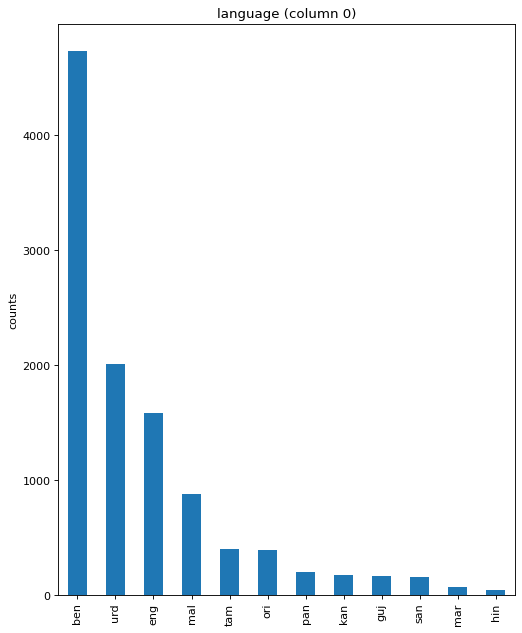

In [8]:
plotPerColumnDistribution(dataset, 10, 5)

In [ ]:
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter
from sklearn.datasets import make_classification

y=dataset['language']
X=dataset.drop(['language'],axis=1)
y.value_counts()

ros=RandomOverSampler(random_state=12)
X,y=ros.fit_resample(X,y)
y.value_counts()
X['language']=y
dataset=X


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np
import seaborn as sns

# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [ ]:
plotPerColumnDistribution(dataset, 10, 5)

In [ ]:
from sklearn.model_selection         import train_test_split
text = dataset.Text
language = dataset.language
train_features, test_features, train_labels, test_labels = train_test_split(text, language, test_size=0.20, random_state=5)

In [ ]:
print('lenght of training data = ',len(train_features))
print('lenght of test data = ', len(test_features))

In [ ]:
from sklearn.feature_extraction.text import*
from sklearn                         import preprocessing
from sklearn.preprocessing           import LabelEncoder

In [ ]:
#uni gram
uni_vector =   CountVectorizer( strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(1,1), max_features=1000)
bag_of_words_uni = uni_vector.fit_transform(train_features)
bag_of_words_uni.shape

In [ ]:
#bigram
bi_vector =   CountVectorizer( strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(2,2), max_features=1000)
bag_of_words_bi = bi_vector.fit_transform(train_features)

In [ ]:
#trigram
tri_vector =   CountVectorizer( strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(3,3), max_features=1000)
bag_of_words_tri = tri_vector.fit_transform(train_features)

In [ ]:
#3chargram
char3_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(3,3), max_features=1000)
bag_of_words_char3 = char3_vector.fit_transform(train_features)

In [ ]:
#4chargram
char4_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(4,4), max_features=1000)
bag_of_words_char4 = char4_vector.fit_transform(train_features)

In [ ]:
#5chargram
char5_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(5,5), max_features=1000)
bag_of_words_char5 = char5_vector.fit_transform(train_features)

In [ ]:
#6chargram
char6_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(6,6), max_features=1000)
bag_of_words_char6 = char6_vector.fit_transform(train_features)

In [ ]:
#7chargram
char7_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(7,7), max_features=1000)
bag_of_words_char7 = char7_vector.fit_transform(train_features)

In [ ]:
#8chargram
char8_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(1,1), max_features=1000)
bag_of_words_char8 = char8_vector.fit_transform(train_features)

In [ ]:
#9chargram
char9_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(9,9), max_features=1000)
bag_of_words_char9 = char9_vector.fit_transform(train_features)

In [ ]:
#10chargram
char10_vector =   CountVectorizer( strip_accents='unicode', analyzer='char', token_pattern=r'\w{1,}', 
                          stop_words=None, ngram_range=(10,10), max_features=1000)
bag_of_words_char10 = char10_vector.fit_transform(train_features)

In [ ]:
# Get feature names
uni_feature_names = uni_vector.get_feature_names()
bi_feature_names = bi_vector.get_feature_names()
tri_feature_names = tri_vector.get_feature_names()
char3_feature_names = char3_vector.get_feature_names()
char4_feature_names = char4_vector.get_feature_names()
char5_feature_names = char5_vector.get_feature_names()
char6_feature_names = char6_vector.get_feature_names()
char7_feature_names = char7_vector.get_feature_names()
char8_feature_names = char8_vector.get_feature_names()
char9_feature_names = char9_vector.get_feature_names()
char10_feature_names = char10_vector.get_feature_names()

In [ ]:
uni_train_features=pd.DataFrame(bag_of_words_uni.toarray(), columns=uni_feature_names)
#uni_train_features[:5]

In [ ]:
bi_train_features=pd.DataFrame(bag_of_words_bi.toarray(), columns=bi_feature_names)
tri_train_features=pd.DataFrame(bag_of_words_tri.toarray(), columns=tri_feature_names)
char3_train_features=pd.DataFrame(bag_of_words_char3.toarray(), columns=char3_feature_names)
char4_train_features=pd.DataFrame(bag_of_words_char4.toarray(), columns=char4_feature_names)
char5_train_features=pd.DataFrame(bag_of_words_char5.toarray(), columns=char5_feature_names)
char6_train_features=pd.DataFrame(bag_of_words_char6.toarray(), columns=char6_feature_names)
char7_train_features=pd.DataFrame(bag_of_words_char7.toarray(), columns=char7_feature_names)
char8_train_features=pd.DataFrame(bag_of_words_char8.toarray(), columns=char8_feature_names)
char9_train_features=pd.DataFrame(bag_of_words_char9.toarray(), columns=char9_feature_names)
char10_train_features=pd.DataFrame(bag_of_words_char10.toarray(), columns=char10_feature_names)

In [ ]:
from sklearn.ensemble                import RandomForestClassifier

#apply RandomForestClassifier on train dataset
rfc_uni = RandomForestClassifier()                      
rfc_uni.fit(uni_train_features, train_labels);

rfc_bi = RandomForestClassifier()                      
rfc_bi.fit(bi_train_features, train_labels);

rfc_tri = RandomForestClassifier()                      
rfc_tri.fit(tri_train_features, train_labels);

rfc_char3 = RandomForestClassifier()                      
rfc_char3.fit(char3_train_features, train_labels);

rfc_char4 = RandomForestClassifier()                      
rfc_char4.fit(char4_train_features, train_labels);

rfc_char5 = RandomForestClassifier()                      
rfc_char5.fit(char5_train_features, train_labels);

rfc_char6 = RandomForestClassifier()                      
rfc_char6.fit(char6_train_features, train_labels);

rfc_char7 = RandomForestClassifier()                      
rfc_char7.fit(char7_train_features, train_labels);

rfc_char8 = RandomForestClassifier()                      
rfc_char8.fit(char8_train_features, train_labels);

rfc_char9 = RandomForestClassifier()                      
rfc_char9.fit(char9_train_features, train_labels);

rfc_char10 = RandomForestClassifier()                      
rfc_char10.fit(char10_train_features, train_labels);

In [ ]:
from sklearn.svm                     import LinearSVC
#apply LinearSVC() on train dataset
lsvc_uni = LinearSVC()                      
lsvc_uni.fit(uni_train_features, train_labels);

lsvc_bi = LinearSVC()                      
lsvc_bi.fit(bi_train_features, train_labels);

lsvc_tri = LinearSVC()                      
lsvc_tri.fit(tri_train_features, train_labels);

lsvc_char3 = LinearSVC()                     
lsvc_char3.fit(char3_train_features, train_labels);

lsvc_char4 = LinearSVC()                     
lsvc_char4.fit(char4_train_features, train_labels);

lsvc_char5 = LinearSVC()                     
lsvc_char5.fit(char5_train_features, train_labels);

lsvc_char6 = LinearSVC()                     
lsvc_char6.fit(char6_train_features, train_labels);

lsvc_char7 = LinearSVC()                     
lsvc_char7.fit(char7_train_features, train_labels);

lsvc_char8 = LinearSVC()                     
lsvc_char8.fit(char8_train_features, train_labels);

lsvc_char9 = LinearSVC()                     
lsvc_char9.fit(char9_train_features, train_labels);

lsvc_char10 = LinearSVC()                     
lsvc_char10.fit(char10_train_features, train_labels);

In [ ]:
from sklearn.linear_model            import LogisticRegression
#apply LogisticRegression() on train dataset
lr_uni = LogisticRegression()                      
lr_uni.fit(uni_train_features, train_labels);

lr_bi = LogisticRegression()                      
lr_bi.fit(bi_train_features, train_labels);

lr_tri = LogisticRegression()                      
lr_tri.fit(tri_train_features, train_labels);

lr_char3 = LogisticRegression()                     
lr_char3.fit(char3_train_features, train_labels);

lr_char4 = LogisticRegression()                     
lr_char4.fit(char4_train_features, train_labels);

lr_char5 = LogisticRegression()                     
lr_char5.fit(char5_train_features, train_labels);

lr_char6 = LogisticRegression()                     
lr_char6.fit(char6_train_features, train_labels);

lr_char7 = LogisticRegression()                     
lr_char7.fit(char7_train_features, train_labels);

lr_char8 = LogisticRegression()                     
lr_char8.fit(char8_train_features, train_labels);

lr_char9 = LogisticRegression()                     
lr_char9.fit(char9_train_features, train_labels);

lr_char10 = LogisticRegression()                     
lr_char10.fit(char10_train_features, train_labels);

## Testing

In [ ]:
uni_test_features = uni_vector.transform(test_features)
uni_test_features=pd.DataFrame(uni_test_features.toarray(), columns=uni_feature_names)
#uni_test_features[:5]

In [ ]:
bi_test_features = bi_vector.transform(test_features)
bi_test_features=pd.DataFrame(bi_test_features.toarray(), columns=bi_feature_names)

In [ ]:
tri_test_features = tri_vector.transform(test_features)
tri_test_features=pd.DataFrame(tri_test_features.toarray(), columns=tri_feature_names)

In [ ]:
char3_test_features = char3_vector.transform(test_features)
char3_test_features=pd.DataFrame(char3_test_features.toarray(), columns=char3_feature_names)

In [ ]:
char4_test_features = char4_vector.transform(test_features)
char4_test_features=pd.DataFrame(char4_test_features.toarray(), columns=char4_feature_names)

In [ ]:
char5_test_features = char5_vector.transform(test_features)
char5_test_features=pd.DataFrame(char5_test_features.toarray(), columns=char5_feature_names)

In [ ]:
char6_test_features = char6_vector.transform(test_features)
char6_test_features=pd.DataFrame(char6_test_features.toarray(), columns=char6_feature_names)

In [ ]:
char7_test_features = char7_vector.transform(test_features)
char7_test_features=pd.DataFrame(char7_test_features.toarray(), columns=char7_feature_names)

In [ ]:
char8_test_features = char8_vector.transform(test_features)
char8_test_features=pd.DataFrame(char8_test_features.toarray(), columns=char8_feature_names)

In [ ]:
char9_test_features = char9_vector.transform(test_features)
char9_test_features=pd.DataFrame(char9_test_features.toarray(), columns=char9_feature_names)

In [ ]:
char10_test_features = char10_vector.transform(test_features)
char10_test_features=pd.DataFrame(char10_test_features.toarray(), columns=char10_feature_names)

#### Random forest Classififier

In [ ]:
predictions_uni_rfc = rfc_uni.predict(uni_test_features)         #prediction
uni_rfc = accuracy_score(test_labels, predictions_uni_rfc)           #accuracy

predictions_bi_rfc = rfc_bi.predict(bi_test_features)         #prediction
bi_rfc = accuracy_score(test_labels, predictions_bi_rfc)           #accuracy

predictions_tri_rfc = rfc_tri.predict(tri_test_features)         #prediction
tri_rfc = accuracy_score(test_labels, predictions_tri_rfc)           #accuracy

predictions_char3_rfc = rfc_char3.predict(char3_test_features)         #prediction
char3_rfc = accuracy_score(test_labels, predictions_char3_rfc)           #accuracy

predictions_char4_rfc = rfc_char4.predict(char4_test_features)         #prediction
char4_rfc = accuracy_score(test_labels, predictions_char4_rfc)           #accuracy

predictions_char5_rfc = rfc_char5.predict(char5_test_features)         #prediction
char5_rfc = accuracy_score(test_labels, predictions_char5_rfc)           #accuracy

predictions_char6_rfc = rfc_char6.predict(char6_test_features)         #prediction
char6_rfc = accuracy_score(test_labels, predictions_char6_rfc)           #accuracy

predictions_char7_rfc = rfc_char7.predict(char7_test_features)         #prediction
char7_rfc = accuracy_score(test_labels, predictions_char7_rfc)           #accuracy

predictions_char8_rfc = rfc_char8.predict(char8_test_features)         #prediction
char8_rfc = accuracy_score(test_labels, predictions_char8_rfc)           #accuracy

predictions_char9_rfc = rfc_char9.predict(char9_test_features)         #prediction
char9_rfc = accuracy_score(test_labels, predictions_char9_rfc)           #accuracy

predictions_char10_rfc = rfc_char10.predict(char10_test_features)         #prediction
char10_rfc = accuracy_score(test_labels, predictions_char10_rfc)           #accuracy

#### LinearSVC

In [ ]:
predictions_uni_lsvc= lsvc_uni.predict(uni_test_features)         #prediction
uni_lsvc = accuracy_score(test_labels, predictions_uni_lsvc)           #accuracy

predictions_bi_lsvc = lsvc_bi.predict(bi_test_features)         #prediction
bi_lsvc = accuracy_score(test_labels, predictions_bi_lsvc)           #accuracy

predictions_tri_lsvc = lsvc_tri.predict(tri_test_features)         #prediction
tri_lsvc = accuracy_score(test_labels, predictions_tri_lsvc)           #accuracy

predictions_char3_lsvc = lsvc_char3.predict(char3_test_features)         #prediction
char3_lsvc = accuracy_score(test_labels, predictions_char3_lsvc)           #accuracy

predictions_char4_lsvc = lsvc_char4.predict(char4_test_features)         #prediction
char4_lsvc = accuracy_score(test_labels, predictions_char4_lsvc)           #accuracy

predictions_char5_lsvc = lsvc_char5.predict(char5_test_features)         #prediction
char5_lsvc = accuracy_score(test_labels, predictions_char5_lsvc)           #accuracy

predictions_char6_lsvc = lsvc_char6.predict(char6_test_features)         #prediction
char6_lsvc = accuracy_score(test_labels, predictions_char6_lsvc)           #accuracy

predictions_char7_lsvc = lsvc_char7.predict(char7_test_features)         #prediction
char7_lsvc = accuracy_score(test_labels, predictions_char7_lsvc)           #accuracy

predictions_char8_lsvc = lsvc_char8.predict(char8_test_features)         #prediction
char8_lsvc = accuracy_score(test_labels, predictions_char8_lsvc)           #accuracy

predictions_char9_lsvc = lsvc_char9.predict(char9_test_features)         #prediction
char9_lsvc = accuracy_score(test_labels, predictions_char9_lsvc)           #accuracy

predictions_char10_lsvc = lsvc_char10.predict(char10_test_features)         #prediction
char10_lsvc = accuracy_score(test_labels, predictions_char10_lsvc)           #accuracy

#### Logistic Regression

In [ ]:
predictions_uni_lr = lr_uni.predict(uni_test_features)         #prediction
uni_lr = accuracy_score(test_labels, predictions_uni_lr)           #accuracy

predictions_bi_lr = lr_bi.predict(bi_test_features)         #prediction
bi_lr = accuracy_score(test_labels, predictions_bi_lr)           #accuracy

predictions_tri_lr = lr_tri.predict(tri_test_features)         #prediction
tri_lr = accuracy_score(test_labels, predictions_tri_lr)           #accuracy

predictions_char3_lr = lr_char3.predict(char3_test_features)         #prediction
char3_lr = accuracy_score(test_labels, predictions_char3_lr)           #accuracy

predictions_char4_lr = lr_char4.predict(char4_test_features)         #prediction
char4_lr = accuracy_score(test_labels, predictions_char4_lr)           #accuracy

predictions_char5_lr = lr_char5.predict(char5_test_features)         #prediction
char5_lr = accuracy_score(test_labels, predictions_char5_lr)           #accuracy

predictions_char6_lr = lr_char6.predict(char6_test_features)         #prediction
char6_lr = accuracy_score(test_labels, predictions_char6_lr)           #accuracy

predictions_char7_lr = lr_char7.predict(char7_test_features)         #prediction
char7_lr = accuracy_score(test_labels, predictions_char7_lr)           #accuracy

predictions_char8_lr = lr_char8.predict(char8_test_features)         #prediction
char8_lr = accuracy_score(test_labels, predictions_char8_lr)           #accuracy

predictions_char9_lr = lr_char9.predict(char9_test_features)         #prediction
char9_lr = accuracy_score(test_labels, predictions_char9_lr)           #accuracy

predictions_char10_lr = lr_char10.predict(char10_test_features)         #prediction
char10_lr = accuracy_score(test_labels, predictions_char10_lr)           #accuracy

In [ ]:
features = uni_vector.transform(dataset.Text)
target=language

In [ ]:
 #apply random forest on train dataset
model=lr_uni.fit(features, target);

In [ ]:

comment = 'வணக்கம்'

user_input= uni_vector.transform([comment])
a=user_input.toarray()
user_input=pd.DataFrame(a, columns=uni_feature_names)


In [ ]:
# fit the model on input
language = model.predict(user_input)  

In [ ]:
language